## Import

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
import time #in order to take sleep between two frames

## KeyPoints and detect using Mediapipe

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils #dramwing utils

In [3]:
#in order to make detection with mediapipe
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False #image is not writeable

    results= model.process(image) #make pred
    
    image.flags.writeable = True #image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion
    return image, results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(255,0,0),thickness=1,circle_radius=1), #color landmark
                              mp_drawing.DrawingSpec(color=(255,0,0),thickness=1,circle_radius=1)) #color the conection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=4), #color landmark
                              mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=2)) #color the conection) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1), #color landmark
                              mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1)) #color the conection) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1), #color landmark
                              mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1)) #color the conection) ) 

In [6]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [7]:
cap = cv2.VideoCapture(0)
#set mediapipe model           #init detect                   #preceiving detect
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened() :
        ret, frame = cap.read()

        #   make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #draw landmark
        #draw_landmarks(image,results) #basic
        draw_styled_landmarks(image,results) #cool one

        cv2.imshow('opencv Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
             break

cap.release()
cv2.destroyAllWindows()




<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

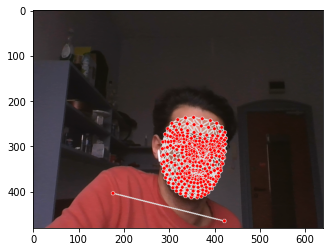

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

## Extract Keypoints

In [12]:
results.pose_landmarks.landmark[0].y #to see 

0.691780686378479

In [13]:
#i NEED TO flatten my array bc i need that format (one big array) to my LSTM model

#we include a blank array bc if in the 
#last frame we do not have rh(ex) it will return an error
#so in case there no landmarks return a blank array 
# we will need this in the LSTM 
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(132)

lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
               
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results) :
    #i NEED TO flatten my array bc i need that format (one big array) to my LSTM model

    #we include a blank array bc if in the 
    #last frame we do not have rh(ex) it will return an error
    #so in case there no landmarks return a blank array 
    # we will need this in the LSTM 
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(132)

    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
               
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

    return np.concatenate([pose, face, lh ,rh])


In [15]:
results_test =extract_keypoints(results)

In [16]:
np.save('0',results_test) #to save our np array

## Setup Folder for collection

In [18]:
DATA_PATH = os.path.join('MP_Data') #path for the exported data

#action try to detect
actions = np.array(['hello' , 'thanks' , 'ILoveyou' ])
# like collect 30 videos
no_sequence = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [19]:
# try to create each folder for each sequence(video)
for action in actions : 
    for sequence in range(no_sequence) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action , str(sequence)))
        except : 
            pass

## collect Keypont val for train and test

In [16]:
cap = cv2.VideoCapture(0)
#set mediapipe model           #init detect                   #preceiving detect
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop throuth actions
    for action in actions :
        #loop through videos
        for sequence in range(no_sequence) : 
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                ret, frame = cap.read()

                #   make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #draw landmark
                #draw_landmarks(image,results) #basic
                draw_styled_landmarks(image,results) #cool one

                #apply wait logic=> we will collect 30 image than break in order to change position and so on
                if frame_num == 0:
                    cv2.putText(image,'Strating Collecting', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} video Num {}'.format(action,sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else : 
                    cv2.putText(image,'Collecting frames for {} video Num {}'.format(action,sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 1, cv2.LINE_AA)
                #Export Keypoint
                keypoints = extract_keypoints(results) #extract from results(mediapipe)
                npy_path = os.path.join(DATA_PATH , action, str(sequence), str(frame_num)) #join this result to the specific folder
                np.save(npy_path, keypoints) #save them

                cv2.imshow('opencv Feed', image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

## preprocess Data and create Labels Features

In [20]:
from sklearn.model_selection import train_test_split #partinate our data
from tensorflow.keras.utils import to_categorical #usueful to convert data

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map
sequences, labels = [], [] #x data , y data

In [23]:
sequences, labels = [], [] #x data , y data
for action in actions : 
    for sequence in range(no_sequence) :
        window = [] #all diff frame for particular sequence
        for frame_num in range(sequence_length) :
            
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
x = np.array(sequences)
x.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
y #first one hello ... and so on last one please

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.5)

In [30]:
y_test.shape

(45, 3)

## Build LSTM network and train

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow import keras 
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)


In [33]:
keras.backend.clear_session()

In [34]:
modelnew = Sequential()
modelnew.add(LSTM(64, return_sequences=True, activation='relu',input_shape=(30,1662)))
modelnew.add(LSTM(128, return_sequences=True, activation='relu'))

modelnew.add(LSTM(64,return_sequences=False,activation='relu'))

modelnew.add(Dense(64,activation='relu'))
modelnew.add(Dense(32, activation='relu'))
modelnew.add(Dense(actions.shape[0], activation= 'softmax'))


In [35]:
modelnew.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [36]:
x.shape 

(90, 30, 1662)

In [37]:
modelnew.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [93]:
modelnew.fit(x_train, y_train , epochs=2000 , callbacks = [tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 565ms/step - loss: 1.7971 - categorical_accuracy: 0.1444
Epoch 2/2000
3/3 [==============================] - 1s 254ms/step - loss: 3.5281 - categorical_accuracy: 0.1667
Epoch 3/2000
3/3 [==============================] - 1s 245ms/step - loss: 9.3191 - categorical_accuracy: 0.1222
Epoch 4/2000
3/3 [==============================] - 1s 220ms/step - loss: 8.6229 - categorical_accuracy: 0.1222
Epoch 5/2000
3/3 [==============================] - 1s 236ms/step - loss: 7.5336 - categorical_accuracy: 0.1667
Epoch 6/2000
3/3 [==============================] - 1s 219ms/step - loss: 6.1649 - categorical_accuracy: 0.1444
Epoch 7/2000
3/3 [==============================] - 1s 234ms/step - loss: 8.1136 - categorical_accuracy: 0.1111
Epoch 8/2000
3/3 [==============================] - 1s 248ms/step - loss: 5.8124 - categorical_accuracy: 0.1778
Epoch 9/2000
3/3 [==============================] - 1s 216ms/step - loss: 15.7879 - categorical_accuracy

KeyboardInterrupt: 

In [38]:
modelnew.load_weights('action.h5')

In [ ]:
# i stopped the training intentionally because I had good result,
#and i was afraid of overfitting

## make Pred

In [39]:
res = modelnew.predict(x_test)

In [40]:
actions[np.argmax(res[0])]

'thanks'

In [41]:
actions[np.argmax(y_test[0])]

'thanks'

## Eval with Sklearn

In [42]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [43]:
yhat = modelnew.predict(x_test)

In [44]:
ytrue = np.argmax(y_test, axis=1).tolist() #
yhat = np.argmax(yhat, axis=1).tolist()

In [45]:
multilabel_confusion_matrix(ytrue,yhat) 
#[tn  fp
# fn    tp]   
#we want our diagonal matrix to be the most higher 
#which is our case

array([[[27,  1],
        [ 6, 11]],

       [[20, 10],
        [ 3, 12]],

       [[25,  7],
        [ 9,  4]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)
#could do better ... may be i'll train in again

## Test RT

In [47]:
cap.release()
cv2.destroyAllWindows()

In [48]:
colors = [(245,117,16), (117,245,16), (198,227,2)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [45]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = modelnew.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti